In [41]:
#Data stuff numpy and pandas
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

#Matplot and seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

#Machine learning stuff
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#change working dir
import os
os.chdir(os.path.abspath('/home/michaelg/Kaggle/Titanic'))

In [30]:
train_titanic_DataFrame = pd.read_csv('train.csv', dtype = {"Age": np.float32},)
test_titanic_DataFrame = pd.read_csv('test.csv', dtype = {"Age": np.float32},)

In [16]:
train_titanic_DataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test_titanic_DataFrame.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
train_titanic_DataFrame.info()
print "_________________"
test_titanic_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float32(1), float64(1), int64(5), object(5)
memory usage: 80.1+ KB
_________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Far

In [31]:
#Drop all the data that we don't need
train_titanic_DataFrame = train_titanic_DataFrame.drop(['PassengerId','Name', 'Ticket'], axis=1)
test_titanic_DataFrame = test_titanic_DataFrame.drop(['PassengerId','Name'], axis=1)

In [32]:
train_titanic_DataFrame['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
#Fill the empty 'Embarked' column with the most common value S
train_titanic_DataFrame['Embarked'] = train_titanic_DataFrame['Embarked'].fillna('S')

In [35]:
train_titanic_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float32(1), float64(1), int64(4), object(3)
memory usage: 59.2+ KB


In [39]:
train_titanic_DataFrame[['Survived', 'Embarked']].groupby(['Embarked'], as)

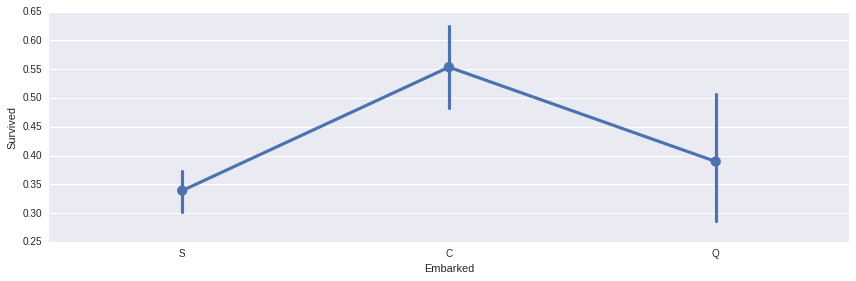

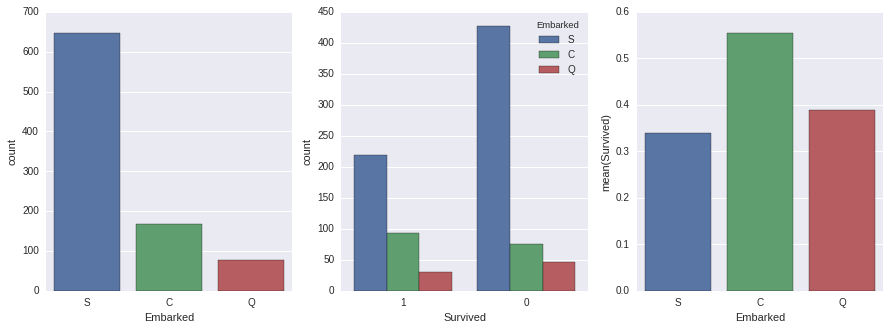

In [43]:
sb.factorplot('Embarked','Survived', data=train_titanic_DataFrame,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sb.countplot(x='Embarked', data=train_titanic_DataFrame, ax=axis1)
sb.countplot(x='Survived', hue="Embarked", data=train_titanic_DataFrame, order=[1,0], ax=axis2)

embark_perc = train_titanic_DataFrame[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sb.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S','C','Q'],ax=axis3)

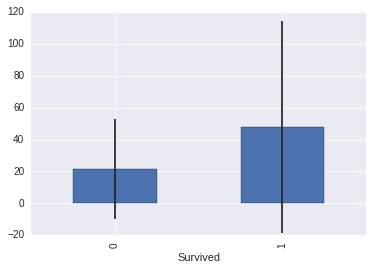

In [57]:
test_titanic_DataFrame['Fare'].fillna(test_titanic_DataFrame['Fare'].median(), inplace=True)
test_titanic_DataFrame['Fare'] = test_titanic_DataFrame['Fare'].astype(int)
train_titanic_DataFrame['Fare'] = train_titanic_DataFrame['Fare'].astype(int)

fare_survived = train_titanic_DataFrame['Fare'][train_titanic_DataFrame['Survived'] == 1]
fare_not_survived = train_titanic_DataFrame['Fare'][train_titanic_DataFrame['Survived']== 0]

avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

avgerage_fare.index.names = std_fare.index.names = ['Survived']
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)